# Predicting Car Prices

In [25]:
import pandas as pd
import numpy as np

## 1. Introduction to the data set

In [26]:
cars = pd.read_csv('imports-85.data')

In [27]:
pd.set_option('display.max_columns', None) # to display all the columns

In [28]:
cars.head() # print the first five rows

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


As we can see, the dataframe has no header. I will use the documentation on the data source website to create a list of column names and pass it as an argument to the `read_csv` method.

In [29]:
columns_name = ['symboling','normalized_losses','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

Now let's read the data again, and pass the `columns_name` as input argument to `read_csv`:

In [30]:
cars = pd.read_csv('imports-85.data',header=None,names=columns_name)

In [31]:
cars.head() # print the first five rows

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Now the dataframe looks like the data set preview. 

The columns that are numeric and can be used as features are: `symboling`, `normalized_losses`, `wheel_base`, `length`, `width`, `height`, `curb_weight`, `engine_size`, `bore`, `stroke`, `compression_ratio`, `horsepower`, `peak_rpm`, `city_mpg`, and `highway_mpg`.

The target column will be `price`.

## 2. Data Cleaning

We can see that the `normalized_losses` column contains missing values represented using "?". We use the `DataFrame.replace()` method to replace all of the ? values with the `numpy.nan` missing value.

In [32]:
cars = cars.replace(to_replace='?', value=np.nan)

Because `?` is a string value, columns containing this value were cast to the pandas `object` data type (instead of a numeric type like `int` or `float`). Let's check which columns need to be converted to numeric types:

In [33]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-nul

It seems that we should convert to numeric types the columns `normalized_losses`, `bore`, `stroke`, `horsepower`, `peak_rpm`, and `price`.

In [34]:
columns_to_convert = ['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']
cars[columns_to_convert] = cars[columns_to_convert].astype('float')

In [11]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-

It looks fine now, the columns with numerical values are of numeric types.

Now let us explore the missing values in the dataframe. First, let us check the number of rows that have a missing value for the `normalized_losses` column.

In [35]:
cars['normalized_losses'].isna().sum()

41

So there are 41 NaN values, out of a total of 205 values, i.e., 20% of the values in the `normalized_losses` column are NaN. Let's explore the missing value counts for the other numeric columns: 

In [36]:
numeric_columns = ['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

for col_name in numeric_columns:
    print(col_name+':', cars[col_name].isna().sum())

symboling: 0
wheel_base: 0
length: 0
width: 0
height: 0
curb_weight: 0
engine_size: 0
bore: 4
stroke: 4
compression_ratio: 0
horsepower: 2
peak_rpm: 2
city_mpg: 0
highway_mpg: 0
price: 4


For the other columns, the amount of missing values is less than 2% for each column. Let's drop the `normalized_losses` column and keep all the other columns by replacing the missing values with the average value from each column.

In [37]:
cars.drop('normalized_losses', inplace=True, axis=1)

For the column `peak_rpm`, replace the missing values by the mean of the entire column, then check that there are no more missing values and that the mean has not been altered:

In [48]:
columns_with_nans = ['bore', 'stroke', 'horsepower', 'peak_rpm', 'price']

for col in columns_with_nans:
    avg = cars[col].mean().round(decimals=3)
    print(col)
    print('average:', avg)
    cars[col] = cars[col].fillna(avg)
    print('missing:', cars[col].isna().sum())
    # Print new average and round it to three decimals:
    print('new avg:', cars[col].mean().round(decimals=3))

bore
average: 0.564
missing: 0
new avg: 0.564
stroke
average: 0.564
missing: 0
new avg: 0.564
horsepower
average: 0.234
missing: 0
new avg: 0.234
peak_rpm
average: 0.398
missing: 0
new avg: 0.398
price
average: 13207.129
missing: 0
new avg: 13207.129


We still have some cells with missing data, let us just drop the corresponding rows.

In [114]:
cars.dropna(inplace=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 25 columns):
symboling            203 non-null float64
make                 203 non-null object
fuel_type            203 non-null object
aspiration           203 non-null object
num_doors            203 non-null object
body_style           203 non-null object
drive_wheels         203 non-null object
engine_location      203 non-null object
wheel_base           203 non-null float64
length               203 non-null float64
width                203 non-null float64
height               203 non-null float64
curb_weight          203 non-null float64
engine_type          203 non-null object
num_cylinders        203 non-null object
engine_size          203 non-null float64
fuel_system          203 non-null object
bore                 203 non-null float64
stroke               203 non-null float64
compression_ratio    203 non-null float64
horsepower           203 non-null float64
peak_rpm             20

Let's keep only the numeric columns:

In [122]:
cars_num = cars[numeric_columns]
cars_num.head()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.0,0.058,0.413,0.317,0.083,0.411,0.260,0.664,0.290,0.125,0.262,0.347,0.222,0.289,13495.0
1,1.0,0.058,0.413,0.317,0.083,0.411,0.260,0.664,0.290,0.125,0.262,0.347,0.222,0.289,16500.0
2,0.6,0.230,0.449,0.433,0.383,0.518,0.343,0.100,0.667,0.125,0.442,0.347,0.167,0.263,16500.0
3,0.8,0.385,0.530,0.492,0.542,0.329,0.181,0.464,0.633,0.188,0.225,0.551,0.306,0.368,13950.0
4,0.8,0.373,0.530,0.508,0.542,0.518,0.283,0.464,0.633,0.062,0.279,0.551,0.139,0.158,17450.0


To normalize all columns in a range of 0 to 1, we will use Min-Max normalization.

#### Min-Max Normalization:
$$ X = \frac{X - X.min}{X.max -  X.min}$$

Let's define a list of the numeric columns that we want to normalize so all values range from 0 to 1, and then perform the normalization by using a lambda function:
NB: I did not handle the missing values in the `price` column, and I will not apply any normalization to it.

In [153]:
columns_to_normalize = ['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']
cars_num[columns_to_normalize] = cars_num[columns_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min())).round(decimals=3)

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Let's check the first ten columns of the resulting dataframe:

In [129]:
cars_num.head(10)

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.0,0.058,0.413,0.317,0.083,0.411,0.260,0.664,0.290,0.125,0.262,0.347,0.222,0.289,13495.000
1,1.0,0.058,0.413,0.317,0.083,0.411,0.260,0.664,0.290,0.125,0.262,0.347,0.222,0.289,16500.000
2,0.6,0.230,0.449,0.433,0.383,0.518,0.343,0.100,0.667,0.125,0.442,0.347,0.167,0.263,16500.000
3,0.8,0.385,0.530,0.492,0.542,0.329,0.181,0.464,0.633,0.188,0.225,0.551,0.306,0.368,13950.000
4,0.8,0.373,0.530,0.508,0.542,0.518,0.283,0.464,0.633,0.062,0.279,0.551,0.139,0.158,17450.000
5,0.8,0.385,0.540,0.500,0.442,0.395,0.283,0.464,0.633,0.094,0.258,0.551,0.167,0.237,15250.000
6,0.6,0.560,0.770,0.925,0.658,0.526,0.283,0.464,0.633,0.094,0.258,0.551,0.167,0.237,17710.000
7,0.6,0.560,0.770,0.925,0.658,0.569,0.283,0.464,0.633,0.094,0.258,0.551,0.167,0.237,18920.000
8,0.6,0.560,0.770,0.925,0.675,0.620,0.264,0.421,0.633,0.081,0.383,0.551,0.111,0.105,23875.000
9,0.4,0.376,0.554,0.633,0.350,0.607,0.264,0.421,0.633,0.000,0.467,0.551,0.083,0.158,13207.129


In [ ]:
print(numeric_columns)
numeric_columns.remove('price')
print(numeric_columns)

## 3. Univariate Model

We start the analysis with some univariate k-nearest neighbors models. This allows us to structure the code workflow and understand the features better.
We create a function named `knn_train_test()` that encapsulates the training and validation process.

In [130]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [203]:
def knn_train_test(df, training_col_name='', target_col_name='price', k=5):
    # MS: Split the data set into two partitions:
    # - the training set contains the majority of the rows (75%)
    # - the test set contains the remaining minority of the rows (25%)
    
    nb_rows = len(df)
    np.random.seed(1)
    
    # Shuffle the indices
    idx = np.random.permutation(nb_rows)
    
    train_df = df.iloc[idx[0:round(nb_rows * .75)]].copy()
    test_df = df.iloc[idx[round(nb_rows * .75):]].copy()
        
    # MS: Create an instance of the KNeighborsRegressor class
    # The default number of neighbors nb_neighbors is set to 5
    knn = KNeighborsRegressor(n_neighbors=k)
       
    # MS: Fit the model on the training set
    knn.fit(train_df[training_col_name], train_df[target_col_name])
    
    # MS: Make predictions on the training_col_name from test_df
    # to predict the price value for the rows in test_df
    predicted_prices = knn.predict(test_df[training_col_name])
    
    # MS: Calculate the RMSE and return that value
    # MS: The true values are in the column: test_df['price']
    mse = mean_squared_error(test_df[target_col_name], predicted_prices)
    rmse = mse**(1/2)
    
    return(rmse)

Now we use this function to train and test univariate models using the different numeric columns in the data set.

In [204]:
rmse_values = list()
for feature in numeric_columns:
    rmse = knn_train_test(cars_num,[feature])
    rmse_values.append(rmse)

In [205]:
rmse_values

[8490.798625627902,
 5505.260129327342,
 5772.149418599638,
 4352.518158860331,
 7167.593956452231,
 3584.4732031360736,
 4111.5435002018685,
 7539.748191030975,
 7473.343528746731,
 6718.450810548676,
 3669.3739124972717,
 9103.714162106908,
 4186.46849810459,
 4122.5573103882225]

In [126]:
knn_train_test('engine_size', 'price', cars_num)

176    0.230
177    0.230
18     0.000
60     0.230
145    0.177
32     0.068
29     0.358
41     0.185
69     0.460
39     0.185
172    0.321
45     0.109
154    0.117
96     0.136
4      0.283
149    0.177
173    0.230
163    0.140
11     0.177
118    0.109
36     0.117
100    0.223
121    0.109
179    0.415
119    0.140
30     0.117
57     0.034
16     0.558
91     0.136
52     0.113
       ...  
164    0.140
90     0.158
200    0.302
47     0.743
64     0.230
76     0.117
94     0.136
189    0.181
89     0.136
140    0.177
10     0.177
33     0.117
85     0.230
161    0.140
102    0.453
127    0.502
23     0.140
128    0.502
9      0.264
175    0.230
106    0.453
156    0.140
137    0.226
113    0.223
193    0.181
66     0.275
15     0.558
42     0.185
168    0.321
111    0.223
Name: engine_size, Length: 152, dtype: float64
176    10898.000
177    11248.000
18      5151.000
60      8495.000
145    11259.000
32      5399.000
29     12964.000
41     12945.000
69     28176.000
39     

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 152]

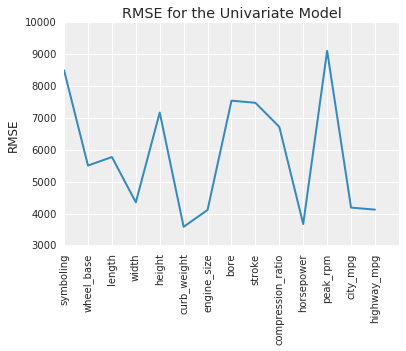

In [206]:
import matplotlib.pyplot as plt
%matplotlib inline

x = list(range(0,len(rmse_values)))  
plt.plot(x,rmse_values)
plt.xticks(np.arange(len(rmse_values)), numeric_columns, rotation=90)
plt.title('RMSE for the Univariate Model')
plt.ylabel('RMSE')
plt.show()

The column that performs the best using the default k value is `curb_weight`, which has a rmse of 3584.

For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9). Visualize the results using a scatter plot or a line plot.

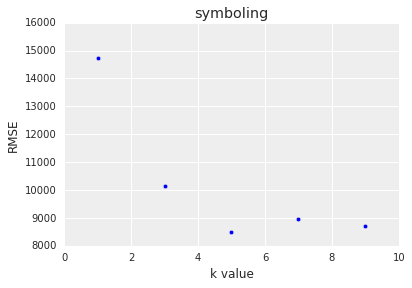

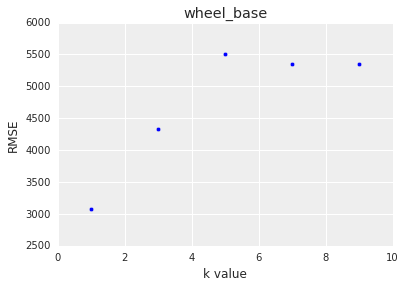

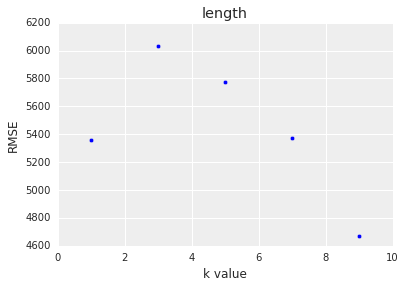

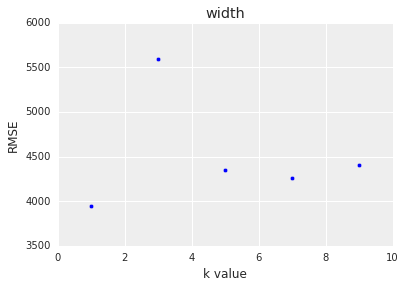

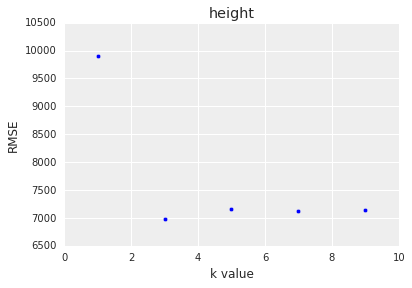

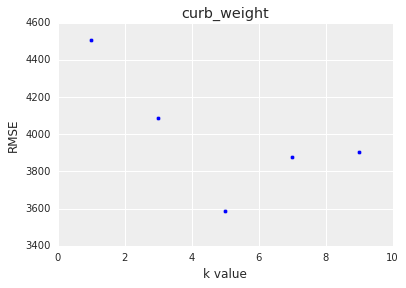

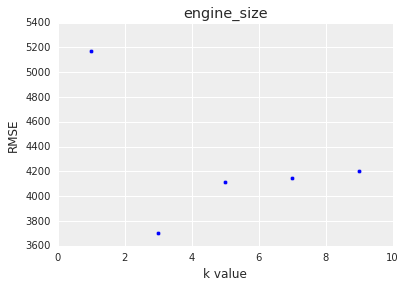

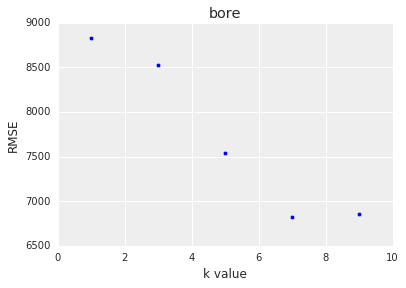

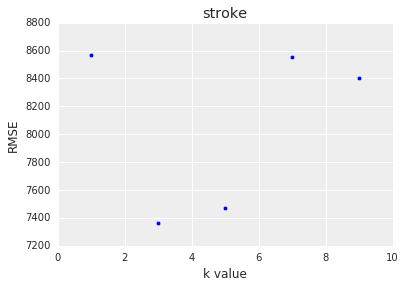

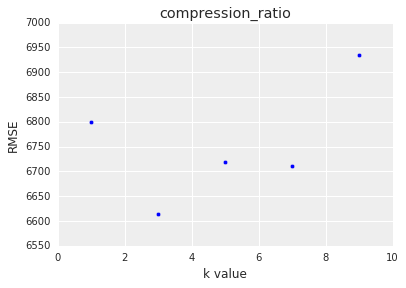

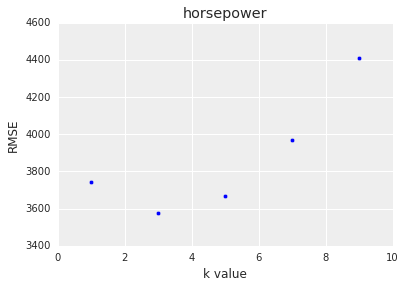

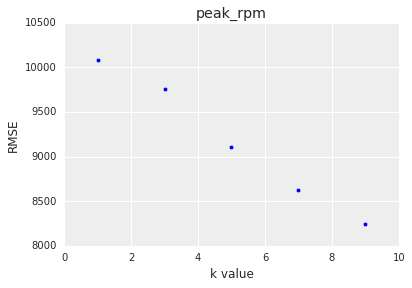

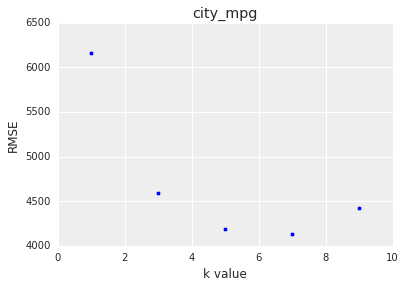

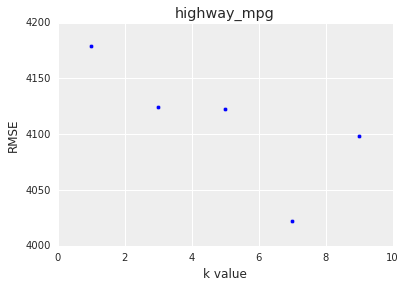

In [291]:
knn_array = [1, 3, 5, 7, 9]
rmse_k = {}
for feature in numeric_columns:
    rmse_values = list()
    for knn in knn_array:
        rmse = knn_train_test(cars_num, [feature], k=knn)
        rmse_values.append(rmse)
        
    # Save all the results in a dictionary:
    rmse_k[feature] = rmse_values
    
    plt.scatter(knn_array,rmse_values)
    plt.title(feature)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.show()

Convert `rmse_k` into a dataframe:

In [215]:
results = pd.DataFrame(rmse_k, index=knn_array)
results.head(10)

,bore,city_mpg,compression_ratio,curb_weight,engine_size,height,highway_mpg,horsepower,length,peak_rpm,stroke,symboling,wheel_base,width
1,8825.762307,6154.496397,6799.792829,4508.805207,5167.119160,9910.148489,4178.980719,3744.084017,5359.362316,10085.463100,8567.418666,14726.118300,3070.809728,3943.561250
3,8530.460580,4590.016694,6613.218267,4088.369789,3699.645036,6977.476102,4124.478050,3574.054578,6032.068372,9759.071350,7362.072164,10154.763976,4325.492077,5592.102942
5,7539.748191,4186.468498,6718.450811,3584.473203,4111.543500,7167.593956,4122.557310,3669.373912,5772.149419,9103.714162,7473.343529,8490.798626,5505.260129,4352.518159
7,6827.548155,4127.820004,6711.807083,3876.207885,4143.215519,7125.509493,4022.575653,3967.366088,5370.469118,8628.118491,8551.409934,8968.114911,5343.016187,4258.008529
9,6855.335618,4428.026657,6934.108522,3906.855356,4202.277116,7149.952812,4098.751541,4412.015242,4669.268432,8247.556122,8401.777099,8703.464189,5352.518219,4409.577236


## 4. Multivariate Model

Modify the knn_train_test() function to accept a list of column names (instead of just a string). Modify the rest of the function logic to use this parameter.

Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.

To understand which features are the best, we will use the dataframe `result` from the previous step. For each feature, let us compute the average RMSE across the different `k` values and store it in a new row:

In [217]:
results.loc['avg'] = results.apply(np.mean)
results.head(10)

,bore,city_mpg,compression_ratio,curb_weight,engine_size,height,highway_mpg,horsepower,length,peak_rpm,stroke,symboling,wheel_base,width
1,8825.762307,6154.496397,6799.792829,4508.805207,5167.119160,9910.148489,4178.980719,3744.084017,5359.362316,10085.463100,8567.418666,14726.118300,3070.809728,3943.561250
3,8530.460580,4590.016694,6613.218267,4088.369789,3699.645036,6977.476102,4124.478050,3574.054578,6032.068372,9759.071350,7362.072164,10154.763976,4325.492077,5592.102942
5,7539.748191,4186.468498,6718.450811,3584.473203,4111.543500,7167.593956,4122.557310,3669.373912,5772.149419,9103.714162,7473.343529,8490.798626,5505.260129,4352.518159
7,6827.548155,4127.820004,6711.807083,3876.207885,4143.215519,7125.509493,4022.575653,3967.366088,5370.469118,8628.118491,8551.409934,8968.114911,5343.016187,4258.008529
9,6855.335618,4428.026657,6934.108522,3906.855356,4202.277116,7149.952812,4098.751541,4412.015242,4669.268432,8247.556122,8401.777099,8703.464189,5352.518219,4409.577236
avg,7715.770970,4697.365650,6755.475502,3992.942288,4264.760066,7666.136171,4109.468655,3873.378768,5440.663531,9164.784645,8071.204278,10208.652000,4719.419268,4511.153623


Sort the features in ascending order according to the average RMSE:

In [237]:
# By using index we keep only the indices (i.e., the names of the best features)
best_features = results.loc['avg'].sort_values().index
best_features

Index(['horsepower', 'curb_weight', 'highway_mpg', 'engine_size', 'width',
       'city_mpg', 'wheel_base', 'length', 'compression_ratio', 'height',
       'bore', 'stroke', 'peak_rpm', 'symboling'],
      dtype='object')

Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default `k` value.

In [239]:
best_features[:2]

Index(['horsepower', 'curb_weight'], dtype='object')

In [250]:
nb_best_features = list(range(2,len(best_features)))
# Initialize dictionary for RMSE values:
rmse_values = {}
for n in nb_best_features:
    # print(n)
    # print( best_features[:n])
    rmse = knn_train_test(cars_num, best_features[:n])
    rmse_values[n] = rmse
print(rmse_values)

{2: 2954.476560848554, 3: 3055.0266479304446, 4: 3140.1679857413924, 5: 2881.2595938485256, 6: 2955.4961080402636, 7: 2815.2513424517015, 8: 2852.1770380058388, 9: 3018.0510703410214, 10: 3121.9963291788463, 11: 3035.2924281464307, 12: 3266.0282843488935, 13: 3140.36547112055}


In [290]:
print(nb_best_features)
print(rmse_values.values())

plt.plot(nb_best_features, list(rmse_values.values()))
plt.title('RMSE vs number of best features')
plt.xlabel('number of best features')
plt.ylabel('RMSE')
plt.show()

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


AttributeError: 'list' object has no attribute 'values'

It appears that using 7 features gives the smallest RMSE.

## 5. Hyperparameter Tuning

Let's now optimize the model that performed the best in the previous step.
For the top 3 models in the last step, vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.

In [302]:
top_best_features = [2, 3, 4, 5]
knn_array = list(range(1,26))
rmse_k = {}
for n in top_best_features:
    rmse_values = list()
    for knn in knn_array:
        rmse = knn_train_test(cars_num, best_features[:n], k = knn)
        rmse_values.append(rmse)
    rmse_k[n] = rmse_values

In [303]:
final_result = pd.DataFrame(rmse_k, index=range(1,26))
final_result

,2,3,4,5
1,2932.627836,3227.740260,3253.715378,3115.351861
2,3148.875274,2675.262958,3012.967405,2847.097060
3,3121.335017,2676.350382,2858.945775,3048.955492
4,2983.058720,2802.576252,3000.979339,2970.298988
5,2954.476561,3055.026648,3140.167986,2881.259594
6,2827.017489,3050.040694,3286.225767,2792.533408
7,2993.501037,3084.669052,3226.360168,2787.439021
8,3335.636756,3348.561380,3274.046274,2947.825017
9,3564.033088,3477.172664,3531.077502,3050.476314
10,3696.423688,3667.508081,3699.315313,3125.054076


Plot the resulting RMSE values.

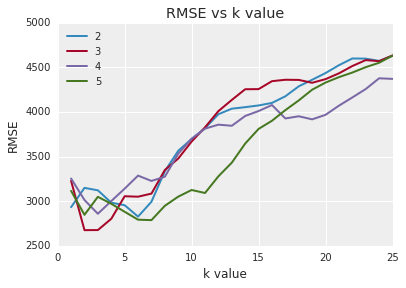

In [305]:
plt.plot(final_result)
plt.title('RMSE vs k value')
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(top_best_features, loc='upper left')
plt.show()

Which k value is optimal for each model? How different are the k values and what do you think accounts for the differences?